"Geo Data Science with Python" 
### Notebook Lesson 6d

---

# PythonnetCDF4

This Jupyter Notebook is part of Module 6 of the course GIS222 (Fall2019). This lesson is preparing you for the final project of the course. Carefully study the content of this Notebook and use the chance to reflect the material through the interactive examples.

### Sources
Documentation pages of the modules [NetCDF4](http://unidata.github.io/netcdf4-python/netCDF4/index.html#section2), [Shapely](https://shapely.readthedocs.io/en/stable/index.html).

---


# Retrieving & Analyzing Science Data: NetCDF

NASA has several data centers, that collect, store and distribute data from their Earth monitoring projects. These centers are represented in the web on the EARTHDATA website, bowered by the "Earth Observing System Data and Information System" ([EOSDIS](https://earthdata.nasa.gov/eosdis/daacs)).

This website has a vast archive of very interesting and exciting data, including all sorts of remote sensing data from visual sensors, other optical sensors like radar, gravimetric platforms, and many derivatives from them. Many other data kinds, like meteorological, ecological or geophysical datasets are also available. Some of these science data have global coverage and some up to 100 years of temporal coverage. Hence, they provide extremely valuable database for many geographical, geospatial or even geophysical analyses.

One of the most common and most easy to use data formats for such science data is the so called NetCDF format (`.nc`). [**NetCDF (Network Common Data Form)**](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit) is a set of interfaces for array-oriented data access. The netCDF libraries support a machine-independent format for representing scientific data. Together, the interfaces, libraries, and format support the creation, access, and sharing of scientific data. 

The Python library (module) for these data has the name [**netCDF4**](http://unidata.github.io/netcdf4-python/netCDF4/index.html). It provides an object-oriented python interface to the netCDF version 4 library. It cannot only read, but also create such archives. 

Here we want to discuss how to use this module to get access to any netcdf file and read it into a numpy array, which we are already able to plot and analyze.

To begin, let's import the package `Dataset` from the module netCDF4, which is all we need!

In [1]:
from netCDF4 import Dataset 

For this notebook, we have downloaded a [sample netCDF file from the website of the University Corporation for Atmospheric Research (UCAR)](https://www.unidata.ucar.edu/software/netcdf/examples/files.html). The file provides 24 time steps of sea surface temperatures collected for use by the IPCC. For this exercise we are looking into a tiny fraction of the dataset for this exerciese: the years 2001 and 2002. The dataset has a spatial resolution of 2 degree in longitudinal and 1 degree in latitudinal direction.

The file is named `tos_O1_2001-2002.nc`. 

You will not be able to look into the file though a text editor, as the netCDF-file is not saved in a text format, but rather in a compressed archive. However, we can use the netCDF4 module to import the file and then look inside using some netCDF functions.

In [2]:
# reading the netCDF-file and saving the content to 'ncData'
ncData = Dataset('./tos_O1_2001-2002.nc')

Now, we can print out the basic information about the dataset stored in `ncData` using the print function:

In [3]:
# printing info for the netCDF dataset, as stored in the dataset itself
print(ncData)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

This looks a bit cryptic. It has the structure similar to a dictionary. You see some keys (`title`, `source`, `history`, `variables`) and then some information related to that. The most important information is contained at the bottom of the text after `variables`. The content of this entry indicates exactly, which variable are stored inside the dataset, what their dimensions and data types are:

"**variables(dimensions)**: float64 **lon(lon)**, float64 lon_bnds(lon,bnds), float64 **lat(lat)**, float64 lat_bnds(lat,bnds), float64 **time(time)**, float64 time_bnds(time,bnds), float32 **tos(time,lat,lon)**"

You can see a temporal variable (`time`) and spatial coordinates (`lon`, `lat`). The actual data set has the name `tos` and is listed at the very end. You can ignore the bands (`bnds`) entries.

Now that we know the names of the variable inside the datasets, we can easily access specific information on them using the attribute (or key) `variables` and by referencing the name of the variable we are interested in (exactly as we are used to from dictionaries):

In [4]:
# printing info on variable 'lat'
ncData.variables['lat'] 

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
# printing info on variable 'lon'
ncData.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
# printing info on variable 'tos'
ncData.variables['tos']

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on

These outputs provide us with the exact shape of each data variable. There is also more information on the content of the variables, for example units, longer descriptive names and other information.

We can see that our sea surface temperatures saved in the netCDF variable `tos` contains 24 map grids (every months during 2001-2002) and the data unit is *Kelvin*. There is also information about which values are indicating missing values: $10^{20}$.

To retrieve the content of the variables, we simply add the operator `[:]` to the same statement and assign the result to a variable. This creates a literal copy of the variable content to a numpy array. For example for the data variable `tos`:

In [7]:
# writing content of the variable 'tos' in ncData to a separate variable 'ncTos' (numpy array)
ncTos = ncData.variables['tos'][:]
ncTos

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.4374694824219, 271.4379577636719, 271.43841552734375, ...,
          271.4361877441406, 271.4365539550781, 271.4369812011719],
         [271.4451904296875, 271.44525146484375, 271.4453125, ...,
          271.445068359375, 271.4450988769531, 271.44512939453125],
         [271.4591979980469, 271.45916748046875, 271.4591369628906, ...,
          271.459228515625, 271.459228515625, 271.4591979980469]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.4344482421875, 271.4346008300781, 271.434814453125, ...,
          271.4345397949219, 271.4343566894531, 271.434326171875],
         [271.44573974609375, 271.4457092285156, 271.4456787109375, ...,
          271.4458312988281, 271.44580078125, 271.44573974609375],
         [271.458007812

However, this is not yet a simple numpy array, but a `masked_array`. We have to consider that some netCDF variables come with two objects, a `data` and a `mask` object inside the array. For the lat/lon variables the mask object is empty, but for the data variable `tos` we have a `mask` and a `data` object. We can reference each of them with the dot-operator. So let's save all of the data we need into new variables:

In [8]:
# writing content of all other interesting variables in ncData to separate numpy arrays
ncLat = ncData.variables['lat'][:].data
ncLon = ncData.variables['lon'][:].data
ncTime = ncData.variables['time'][:].data
ncTos_data = ncData.variables['tos'][:].data
ncTos_mask = ncData.variables['tos'][:].mask

After reading all variables, we should close the netCDF-file:

In [9]:
# closing the netCDF file
ncData.close()

And now, let's check the dimensions of the variables:

In [10]:
print("Size of longitude array:",ncLon.shape)
print("Size of latitude array:",ncLat.shape)
print("Size of time array:",ncTime.shape)
print("Size of data array:",ncTos_data.shape)
print("Size of data mask array:",ncTos_mask.shape)

Size of longitude array: (180,)
Size of latitude array: (170,)
Size of time array: (24,)
Size of data array: (24, 170, 180)
Size of data mask array: (24, 170, 180)


You can see, that we have 1 dimensional arrays for longitude, latitude and time. But we have a 3-dimensional array for the dataset. This is because these are 2D maps for different time steps. The first of the three dimensions stands for time (24 steps), the second for latitudes (170 rows in the maps) and the third for longitudes (180 columns in the maps), which you can read from the respective listed dimensions.

Now we need only two more steps to plot some of the data: we have to create a meshgrid, like we did before. But this time, we have the lat/lon vectors (`ncLon` and `ncLat`) already available:

In [11]:
import numpy as np

# converting the 1D coordinate arrays to a meshgrid
ncLonGrid, ncLatGrid = np.meshgrid(ncLon,ncLat)

In [12]:
ncLon.shape  # shape of the 1D coordinate array for lon

(180,)

In [13]:
ncLonGrid.shape # shape of the converted 2D meshgrid array for lon

(170, 180)

Again we have created two meshgrids, one for latitudes and one for longitudes, which have the same dimention as each of the maps in the datasets (for one time step).

Now we can plot the map of one time step from the spatiotemporal dataset (time series of 24 maps). For that, let's extract just the first month:

In [14]:
# assigning first 'tos' map in the time series of 24 maps to a new variable name
ncTos_data_month1 = ncTos_data[0]

In [15]:
import matplotlib.pyplot as plt

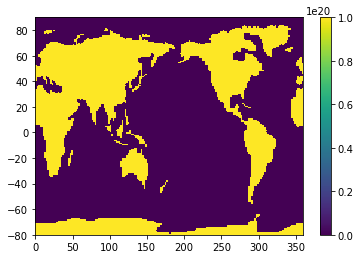

In [19]:
# plotting the first 'tos' map
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[0], shading='auto') 

# adding a colorbar
plt.colorbar()

Oh, we see the continents but no data. Any idea what happended? Have a look at the colorbar! Yes, remember our missing values are of size 1e20. Let's set them to `np.nan`. And transfer the data from Kelvin to Celsius! Then we plot them again.

In [20]:
# converting missing values in 'tos' data to np.nan
ncTos_data[ncTos_data==1e20] = np.nan

# converting 'tos' data from Kelvin to Celsius
ncTos_data = ncTos_data - 273.15

Text(0.5, 1.0, 'Sea Surface Temperature, Jan/2001')

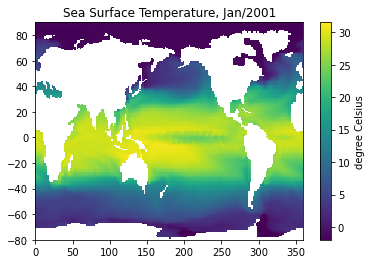

In [22]:
# plotting the first 'tos' map (after replacing missing values with nan)
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[0], shading='auto') 

# adding a colorbar
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jan/2001")

This map shows the global sea surface temperature during the month of January 2001 (since the dataset contains 24 months during 2001 to 2002 and this is the first of the 24 maps in the time series).

Now you can also see why we had a mask object in the dataset: the mask provides information about where the dataset is empty or masked-out. This makes sense here, since we have **sea** surface temperatures.

We can also print the mask aray. However it makes no sense to add a colorbar, as the mask array contains only True and False values (see above, where we looked into the `tos` dataset).

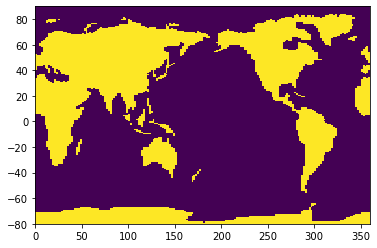

In [26]:
# plotting the mask object of the 'tos' data
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_mask[0], shading='auto') 

But let's get back to the dataset. Now we want to print the month of June 2001:

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

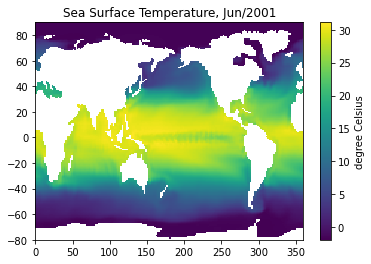

In [28]:
# plotting the sixth map in the 'tos' time series
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[5], shading='auto') 

# adding a colorbar
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

We could do this 24 times, but may visually not see much difference, because variations are small compared to absolute values. So for that, it might be good to aggregate the data in some way. We can, for example caluclate a simple statistic value, like the **mean** sea surface temperature over the entire globe for each of the 24 months! 

For that we are adding a for-loop over the time-dimension of the array in the cell below, so we can caluclate the mean temperature for each month in the time series.
Also, instead of the function `mean()` we will be using the function [`nanmean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html), which ignores nan values in the dataset. This spares us the step of removing the np.nan values before calculating our statistical value. 

In [29]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of the same length, containing zeros
monthlyMeanTos = np.zeros(NoOfMonths) 

# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    
    # using nanmean to make sure nan values are ignored
    monthlyMeanTos[t] = np.nanmean(ncTos_data[t]) 

<div class="alert alert-info">

**Note:**

Use the chance to visit the documentation pagest of functions we introduce and linked. Also search for more similar ones, that you think might be useful. 

</div>

Now we have calculated global mean sea surface temperatures for each month during 2001-2002 and stored this as a time series in the array monthlyMeanTos. Let's have a quick look at the time series, by plotting it. We actually need only one line of code for that, but we will add some more lines for annotations!!!

Text(0, 0.5, 'Temperature (Celsius)')

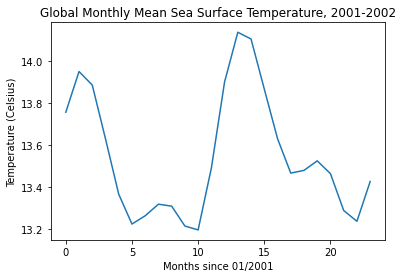

In [30]:
# plotting the time series of mean 'tos' (over the entire globe)
plt.plot(range(NoOfMonths),monthlyMeanTos)

# adding labels
plt.title("Global Monthly Mean Sea Surface Temperature, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

As you can see, on global average, the sea surface temperature varies only by about 1 degree Celsius. But we can see a clear seasonal pattern, with maximum global temperatures during the months January-March.

We could also estimate the mean sea surface temperature for the **northern hemisphere**! For that we just need to slice the data arrays in a way that we receive only the northern part of the global dataset.

For that let's inspect our latitude array!

In [31]:
# printing out the 1D latitude array from the netCDF dataset
ncLat

array([-79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5,
       -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5,
       -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5,
       -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5, -44.5,
       -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5, -35.5,
       -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5, -26.5,
       -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5,
       -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
        -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,
         1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
        19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,
        28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,
        37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,
        46.5,  47.5,

Looking at the list of latitudes above, we just need to cut off the top half of the data arrays in latitude direction! Let's try this! 

We could again use the `np.abs()` and `np.argmin()` function to estimate the index of the equator and the north pole in the latitude array. But let's keep it short at this point. Those are exaclty the indexes 80:170 in the latitude component of the array. In the three array dimensions of the data sets, we will only slice the (middle) latitudinal component. We will not slice the time steps and longitudinal components in the array. However, we do have to slice the lat and lon grids equally: 

In [32]:
# keep all time steps and longitudes, slice only along latitude
ncTos_data_north = ncTos_data[:,80:170,:]

# the same for the meshgrids containing coordinates
ncLonGrid_north = ncLonGrid[80:170,:]
ncLatGrid_north = ncLatGrid[80:170,:]

Now we can test-plot the selection and we will see if we did cut off the correct hemisphere!

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

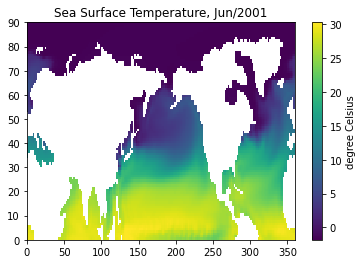

In [34]:
# plotting the first map in the 'tos' data sliced to the northern hemisphere
plt.pcolormesh(ncLonGrid_north, ncLatGrid_north, ncTos_data_north[1], shading='auto') 

# adding a colorbar and labels
cbar = plt.colorbar()
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

This looks good!. Now we will calculate monthly averages from this sliced dataset and plot them for the northern hemisphere only! 

In [35]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of that length
monthlyMeanTOS_north = np.zeros(NoOfMonths)  

# iterating over each month in a for-loop: estimating mean 'tos' for northern hemisphere
for t in range(NoOfMonths):            
    monthlyMeanTOS_north[t] = np.nanmean(ncTos_data_north[t])

Text(0, 0.5, 'Temperature (Celsius)')

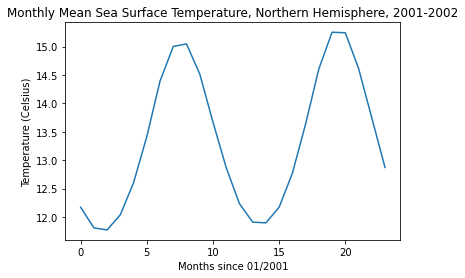

In [36]:
# plotting time series of mean 'tos' in northern hemisphere
plt.plot(range(NoOfMonths),monthlyMeanTOS_north)

# adding labels to the plot
plt.title("Monthly Mean Sea Surface Temperature, Northern Hemisphere, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

This time series clearly shows a larger variability (seasonal up and down) than the previous results for the global averages. Also we are now seeing the warmest months in the summer, as we would expect for the northern part of the planet!!!

### Conclusion

The netCDF data provide a wide range data sets from sciene data archives all around the world, including NASA's data centers. These data are useful for many data analysis projects.